In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv(r'C:\AI workforce\Medical-insurance\insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [22]:
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [23]:
df.shape

(1338, 7)

In [24]:
print(df.duplicated().sum())

1


In [25]:
categorical_cols = df.select_dtypes(include=["object"]).columns
print("\nCategorical Columns:", categorical_cols.tolist())


Categorical Columns: ['sex', 'smoker', 'region']


In [26]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


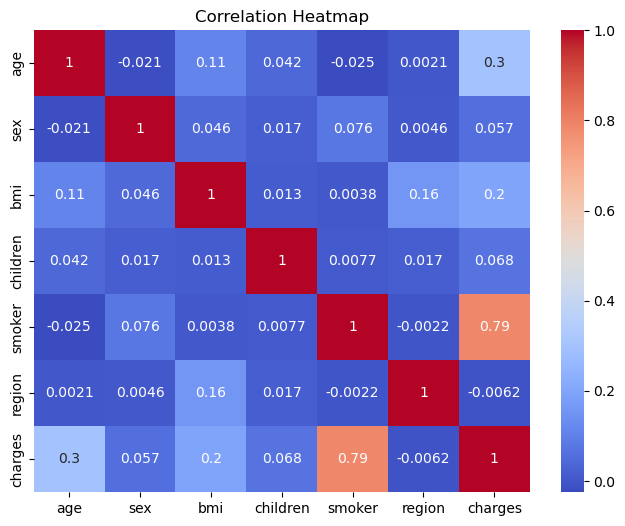

In [27]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [28]:
X = df.drop(columns=["charges"])  
y = df["charges"] 

In [29]:
skew_vals = X.skew().sort_values(ascending=False)
print("Skewness before transformation:\n",skew_vals)

Skewness before transformation:
 smoker      1.464766
children    0.938380
bmi         0.284047
age         0.055673
sex        -0.020951
region     -0.038101
dtype: float64


In [30]:
skewed_cols = skew_vals[abs(skew_vals) > 0.5].index

from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(output_distribution="normal", random_state=42)

X[skewed_cols] = qt.fit_transform(X[skewed_cols])

print("Skewness after transformation:\n", X[skewed_cols].skew())

Skewness after transformation:
 smoker      1.464766
children   -0.102303
dtype: float64


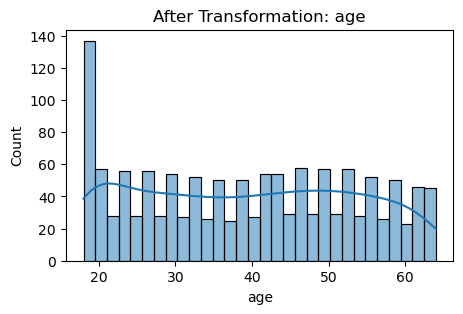

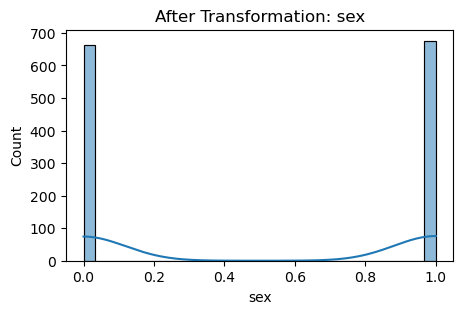

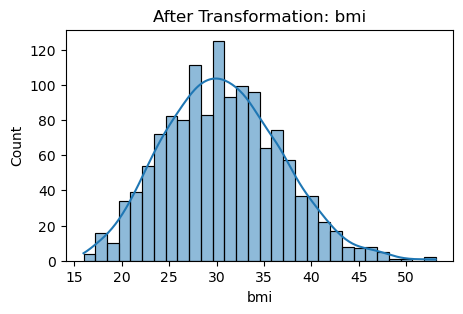

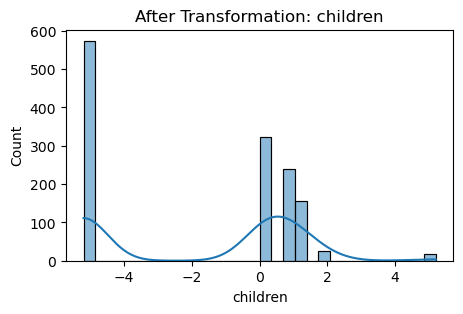

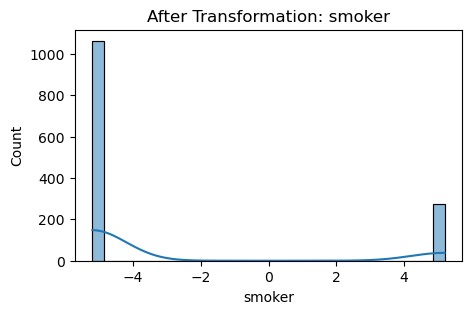

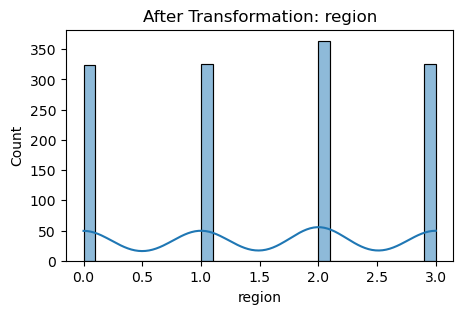

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in X.columns:
    plt.figure(figsize=(5,3))
    sns.histplot(X[col], kde=True, bins=30)
    plt.title(f"After Transformation: {col}")

In [32]:
df.to_csv("prediction.csv")